# **Introduction:-**

The Movie Ratings dataset contains key information about movies, including their name, release year, runtime (in minutes), viewer ratings (out of 10), number of votes, genre, and language.

Importance of Analysis:
Understanding Audience Preferences: Analyze how different genres, languages, and runtimes influence viewer ratings.
Trend Identification: Explore trends in movie popularity and ratings over time.
Correlation Insights: Investigate relationships between movie runtime, ratings, and number of votes to understand factors driving success.
This dataset provides valuable insights for understanding movie industry trends and audience behaviors.


# **Importing Libraries**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime



In [88]:
input_path=r"C:\Users\Suman Mondal\Downloads\1207 Assessment 4\Assessment 4"
os.listdir(input_path)


['Assessment 4.pdf', 'Dataset.csv']

# **Load Data**

In [89]:
Movies_data =pd.read_csv(input_path+"\\Dataset.csv")
Movies_data.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi


As we can see there is some "-" mentioned over null values we are keeping a copy of the dataset to further analysis

In [90]:
Movies_copy = Movies_data.copy()
Movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


# **Task 2(Data Cleaning)**

Primary Inspection:
<br>In this dataset the Nan Values are denoted by(-), for that it is showing wrong no-null values
<br> We have to replace them with blank value and study further dataset


In [91]:
#Replacing (-) with blank
Movies_copy.replace("-",np.nan, inplace=True)
Movies_copy.isnull().sum()

ID              2508
Movie Name         0
Year            1561
Timing(min)    25892
Rating(10)     26926
Votes          26925
Genre           8581
Language           0
dtype: int64

In [92]:
#Filter rows where rating, votes, timing, genre, and year are null
blank_rows = Movies_copy[(Movies_copy['Rating(10)'].isnull()) & 
                    (Movies_copy['Votes'].isnull()) & 
                    (Movies_copy['Timing(min)'].isnull()) & 
                    (Movies_copy['Genre'].isnull()) & 
                    (Movies_copy['Year'].isnull())]
# Step 2: Count the number of such rows
blank_rows = len(blank_rows)

# Display the total number of rows where rating, votes, timing, genre, and year are null
print(f"Total number of rows where rating, votes, timing, genre, and year are null: {blank_rows}")

Total number of rows where rating, votes, timing, genre, and year are null: 99


This data set contains 99 rows where rating, votes, timing, genre, and year has Null values which will not help in our analysis, so drop this rows from our dataset

In [93]:
#Droping the rows where rating, votes, timing, genre, and year column contain null value
Movies_copy.drop(Movies_copy[Movies_copy['Rating(10)'].isnull() &
                   Movies_copy['Votes'].isnull() &
                   Movies_copy['Timing(min)'].isnull() &
                   Movies_copy['Genre'].isnull() &
                   Movies_copy['Year'].isnull()].index, inplace=True)
Movies_copy.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,NaN,NaN,NaN,NaN,hindi
1,tt1702558,Nadir Khan,1968,NaN,NaN,NaN,NaN,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,NaN,2.2,20,NaN,urdu
4,tt0049595,Parivar,1956,NaN,7.4,21,"Comedy, Drama, Family",hindi


In [94]:
#Finding duplicate values
duplicates_values = Movies_copy[Movies_copy['Movie Name'].duplicated(keep="first")]

# Step 2: Count the number of duplicate values
duplicates_values = len(duplicates_values)

# Display the number of duplicate values
print(f"Total number of Duplicate Values: {duplicates_values}")


Total number of Duplicate Values: 8142


In [95]:
# Finding Unique Movie names
Unique_Movie_count=Movies_copy["Movie Name"].nunique()
Unique_Movie_count

42361

In [96]:
#Removing Duplicates
Movies_copy = Movies_copy.drop_duplicates(subset='Movie Name', keep='first')
Movies_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42361 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           40240 non-null  object
 1   Movie Name   42361 non-null  object
 2   Year         41027 non-null  object
 3   Timing(min)  20602 non-null  object
 4   Rating(10)   19055 non-null  object
 5   Votes        19056 non-null  object
 6   Genre        35139 non-null  object
 7   Language     42361 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


The Year, Timing(min), Rating(10), Votes column contains some other value apart from numeric values
<br> The Year Column is not in proper date time format and contains few anomalies
<br> The Timing(min) column is in string format and contains (min) after value also contains "," in few cells
<br> The Ratings(10) column is in string format.
<br> The Votes column is in string format and contains "," in few cells

In [97]:
# Cleaning and extracting year only from the column Year

# Convert 'year' column to string to handle non-string values
Movies_copy['Year'] = Movies_copy['Year'].astype(str)

# Extract the numeric part of the 'year' column using regex
Movies_copy['Year'] = Movies_copy['Year'].str.extract('(\d{4})')

# Fill NaN values using the backfill method
Movies_copy['Year'] = Movies_copy['Year'].fillna(method='bfill')

# Convert the 'year' column to datetime
Movies_copy['Year'] = pd.to_datetime(Movies_copy['Year'], format='%Y')

# Extract only the year as integer
Movies_copy['Year'] = Movies_copy['Year'].dt.year.astype(int)

# Display the updated DataFrame
Movies_copy.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,NaN,NaN,NaN,NaN,hindi
1,tt1702558,Nadir Khan,1968,NaN,NaN,NaN,NaN,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,NaN,2.2,20,NaN,urdu
4,tt0049595,Parivar,1956,NaN,7.4,21,"Comedy, Drama, Family",hindi


In this approach, we use the backfill method (bfill) to fill missing year values in the dataset. Backfill replaces NaN values with the next valid observation, maintaining data continuity. This method is useful when subsequent values can logically apply to earlier missing entries. It avoids data loss or distortion by filling in a sensible way rather than using arbitrary default values. By preserving the structure, we ensure consistent and reliable analysis.

In [98]:
Movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42361 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           40240 non-null  object
 1   Movie Name   42361 non-null  object
 2   Year         42361 non-null  int32 
 3   Timing(min)  20602 non-null  object
 4   Rating(10)   19055 non-null  object
 5   Votes        19056 non-null  object
 6   Genre        35139 non-null  object
 7   Language     42361 non-null  object
dtypes: int32(1), object(7)
memory usage: 2.7+ MB


In [99]:
# Cleaning and extracting time only from the column Timing(min)

# Remove ' min'
Movies_copy['Timing(min)'] = Movies_copy['Timing(min)'].str.replace(' min', '')

# Remove commas
Movies_copy['Timing(min)'] = Movies_copy['Timing(min)'].str.replace(',', '')  

In [100]:
# Cleaning and extracting numeric value only from the column Votes

# Remove commas
Movies_copy['Votes'] = Movies_copy['Votes'].str.replace(',', '')

In [101]:
#Converting The Numeric Column's Data Type
Movies_copy.loc[:,'Rating(10)'] = pd.to_numeric(Movies_copy['Rating(10)'], errors='coerce')
Movies_copy.loc[:,'Votes'] = pd.to_numeric(Movies_copy['Votes'], errors='coerce')
Movies_copy.loc[:,'Timing(min)'] = pd.to_numeric(Movies_copy['Timing(min)'], errors='coerce')

Movies_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42361 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           40240 non-null  object 
 1   Movie Name   42361 non-null  object 
 2   Year         42361 non-null  int32  
 3   Timing(min)  20602 non-null  float64
 4   Rating(10)   19055 non-null  float64
 5   Votes        19055 non-null  float64
 6   Genre        35139 non-null  object 
 7   Language     42361 non-null  object 
dtypes: float64(3), int32(1), object(4)
memory usage: 2.7+ MB


C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\541582778.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Movies_copy.loc[:,'Rating(10)'] = pd.to_numeric(Movies_copy['Rating(10)'], errors='coerce')
C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\541582778.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Movies_copy.loc[:,'Votes'] = pd.to_numeric(Movies_copy['Votes'], errors='coerce')
C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\541582778.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = new

In [102]:
Movies_copy.isnull().sum()

ID              2121
Movie Name         0
Year               0
Timing(min)    21759
Rating(10)     23306
Votes          23306
Genre           7222
Language           0
dtype: int64

We can see there are huge null values in Timing(min), Rating(10), Votes and Genre has, so we are going to impute null values instead of deleting to prevent data loss

In [103]:
Movies_copy.describe()

,Year,Timing(min),Rating(10),Votes
count,42361.000000,20602.000000,19055.000000,19055.000000
mean,1995.850051,123.732356,6.219412,1157.572448
std,22.065638,48.534626,1.434746,13118.118038
min,1913.000000,1.000000,1.000000,5.000000
25%,1981.000000,111.000000,5.300000,13.000000
50%,2002.000000,130.000000,6.400000,39.000000
75%,2015.000000,145.000000,7.200000,222.000000
max,2024.000000,2565.000000,10.000000,954861.000000


In [104]:
#Calculating mean and meadian of numeric Columns
median_timing=np.ceil(Movies_copy['Timing(min)'].median())
mean_rating=np.ceil(Movies_copy['Rating(10)'].mean())
median_Votes=np.ceil(Movies_copy['Votes'].median())

In [105]:
#Filling up null values of numerical columns by their mean and median to have a statistical overview and prevent data loss
Movies_copy.loc[:,'Timing(min)'] = Movies_copy['Timing(min)'].fillna(median_timing)
Movies_copy.loc[:,'Rating(10)'] = Movies_copy['Rating(10)'].fillna(mean_rating)
Movies_copy.loc[:,'Votes'] = Movies_copy['Votes'].fillna(median_Votes)
Movies_copy.loc[:,'Genre'] = Movies_copy['Genre'].fillna('Not Available') # Change Null values to Not Available


In [106]:
#Changing Datatype to int
Movies_copy.loc[:,'Timing(min)'] = Movies_copy['Timing(min)'].astype(int)
Movies_copy.loc[:,'Votes'] = Movies_copy['Votes'].astype(int)
Movies_copy.loc[:,'Rating(10)'] = Movies_copy['Rating(10)']
Movies_copy.head(10)

C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\3841541900.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Movies_copy.loc[:,'Timing(min)'] = Movies_copy['Timing(min)'].astype(int)
C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\3841541900.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Movies_copy.loc[:,'Votes'] = Movies_copy['Votes'].astype(int)


,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,130,7.0,39,Not Available,hindi
1,tt1702558,Nadir Khan,1968,130,7.0,39,Not Available,urdu
2,tt0493437,Apna Sapna Money Money,2006,134,5.3,1892,"Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,130,2.2,20,Not Available,urdu
4,tt0049595,Parivar,1956,130,7.4,21,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008,130,7.0,39,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019,112,7.9,16,Drama,hindi
7,tt0829459,A Mighty Heart,2007,108,6.6,26885,"Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939,130,7.0,39,Action,hindi
9,tt0364628,Raktalekha,1992,175,6.3,12,Drama,bengali


In [107]:
Movies_copy.describe()

,Year,Timing(min),Rating(10),Votes
count,42361.000000,42361.000000,42361.000000,42361.000000
mean,1995.850051,126.951772,6.648873,542.160879
std,22.065638,33.991483,1.037657,8815.634872
min,1913.000000,1.000000,1.000000,5.000000
25%,1981.000000,130.000000,6.600000,39.000000
50%,2002.000000,130.000000,7.000000,39.000000
75%,2015.000000,130.000000,7.000000,39.000000
max,2024.000000,2565.000000,10.000000,954861.000000


# **Task 3**

## Univariate Analysis:
1. Distribution of Ratings
2. Most Common Ratings Given 
3. Analyze Genre Distribution

In [108]:
# 1.Analyzing the Distribution of Ratings
Movies_copy['Rating(10)'].describe()

count    42361.000000
mean         6.648873
std          1.037657
min          1.000000
25%          6.600000
50%          7.000000
75%          7.000000
max         10.000000
Name: Rating(10), dtype: float64

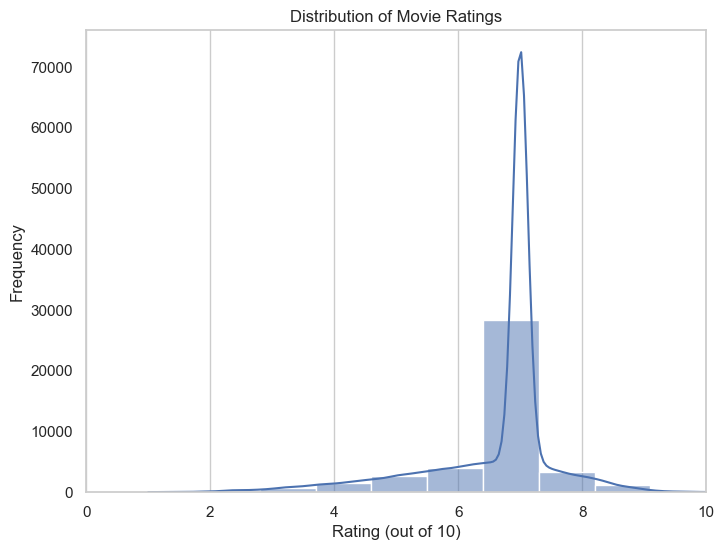

In [109]:
# Set the style of matplotlib
sns.set_style('whitegrid')

# Create a histogram for the rating column
plt.figure(figsize=(8, 6))
sns.histplot(Movies_copy['Rating(10)'], bins=10, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Frequency')
plt.xlim(0, 10)  # Limit x-axis from 0 to 10 for ratings
plt.grid(axis='y')

# Show the plot
plt.show()

## From Analyzing the Distribution of Ratings we find:

1. Average Rating: The average movie rating is approximately 6.65, indicating a generally positive reception among viewers, although there is some variability in the ratings as shown by the standard deviation of 1.04.

2. Distribution Characteristics: The median rating of 7.0, along with the first quartile at 6.6 and the third quartile at 7.0, suggests a distribution that may be slightly skewed, with a significant number of films receiving ratings above 7.

3. Range of Ratings: The ratings span from a minimum of 1.0 to a maximum of 10.0, reflecting a diverse range of viewer opinions, with some movies rated very poorly while others achieve the highest ratings possible.

## Insights from the Distribution of Movie Ratings


1. Central Tendency: The sharp peak in ratings between 6 and 8 indicates that most movies receive ratings within this range, demonstrating a strong central tendency where average ratings cluster.

2. Symmetry and Positive Skew: The distribution appears somewhat symmetrical around the peak, but there is a slightly heavier tail towards higher ratings (8-10). This suggests that users are more inclined to give positive ratings rather than negative ones.

3. Low Ratings: The density of ratings below 4 is minimal, indicating that very few movies receive extremely low ratings. This may reflect the IMDb community's reluctance to rate movies as poor or suggest that fewer low-quality films exist in the dataset.

4. Exceptional High Ratings: The tapering off of the density after a rating of 8 shows that very few movies achieve exceptionally high ratings (9 or above), which aligns with the notion that only a select few films receive critical acclaim and universal appreciation.

5. Narrow Distribution: The relatively narrow distribution of ratings suggests that most ratings fall within a limited range (6-8), indicating that users tend to rate movies conservatively, with few films being considered either very poor or outstandingly good.


## Key Insights:

1. Dominant Rating Range: A significant number of movies are rated between 6 and 8, indicating that viewers tend to favor films that are perceived as "good" to "very good," reflecting a common benchmark for quality in the dataset.

2. Slight Positive Bias: The distribution shows a tendency towards higher ratings (8-10), suggesting that users are more inclined to award positive ratings. This might indicate an overall positive sentiment in the audience's perception of movies.

3. Rarity of Low Ratings: The scarcity of ratings below 4 implies that the IMDb community is either reluctant to classify films as extremely poor or that the dataset includes fewer low-quality films, reflecting a potential bias towards more popular or well-regarded movies.

4. Limited High Ratings: The sharp decline in the frequency of ratings above 8 suggests that very few films achieve exceptional acclaim. This aligns with industry norms where only a handful of movies are universally praised, indicating a high standard for critical success.

5. Conservative Rating Behavior: The narrow distribution of ratings around the mean (primarily between 6 and 8) reflects a conservative approach by viewers when rating movies. This suggests that while many films are appreciated, few are seen as outstanding or poor, leading to a clustering of ratings in the middle range.

In [70]:
#2. Most Common Ratings Given 
most_common_rating=Movies_copy['Rating(10)'].mode()[0]
rating_count=Movies_copy['Rating(10)'].value_counts().sort_index()
print("Frequency of each rating:\n", rating_count)
print("\nMost common rating:", most_common_rating)

Frequency of each rating:
 1.0      2
1.1      1
1.2      2
1.3      3
1.4      6
        ..
9.6     14
9.7      6
9.8      4
9.9      3
10.0     7
Name: Rating(10), Length: 91, dtype: int64

Most common rating: 7.0


In [111]:
# 3. Analyzing Genre Distribution
df_cleaned_genre = Movies_copy[Movies_copy['Genre'] != ''].copy()
df_cleaned_genre['Genre'] = df_cleaned_genre['Genre'].str.split(',')
df_exploded_genre = df_cleaned_genre.explode('Genre').reset_index(drop=True)
df_exploded_genre['Genre'] = df_exploded_genre['Genre'].str.strip()
genre_distribution = df_exploded_genre['Genre'].value_counts()
genre_distribution


Drama            20557
Not Available     7222
Action            6141
Comedy            5645
Romance           5387
Thriller          3494
Crime             2112
Family            2006
Short             1569
Musical           1186
Horror             937
Mystery            921
Adventure          795
Fantasy            709
Documentary        520
History            427
Biography          423
Music              334
Animation          203
Sport              158
Sci-Fi             140
War                140
Talk-Show           56
Reality-TV          38
News                25
Game-Show           11
Western              8
Name: Genre, dtype: int64

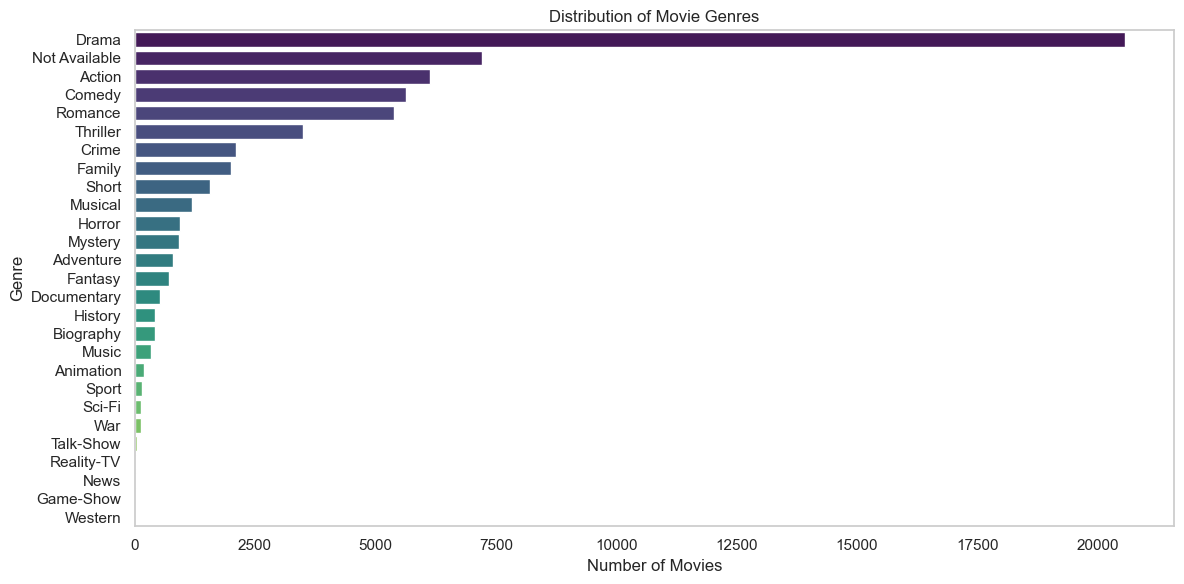

In [112]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded_genre, y='Genre', order=genre_distribution.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

## Key Insights on Genre Distribution

1. **Dominance of Drama**: Drama is overwhelmingly the most common genre, with over 20,000 movies classified under it. This reflects the genre's wide appeal, dealing with emotional narratives that resonate across different cultures.

2. **Popularity of Action, Romance, and Comedy**: Action, Romance, and Comedy together cover a significant portion of the dataset, highlighting their commercial and popular appeal in cinema.

3. **Presence of Thriller and Crime**: Thriller and Crime genres also have a strong presence, suggesting a demand for suspenseful narratives in movies.

4. **Limited Representation of Certain Genres**: Animation, Sci-Fi, Sport, and War have much fewer entries, indicating either limited production or specialized audience preferences. For example, Sci-Fi has only 140 movies, while Animation has 203.

5. **Rarity of Certain Formats**: Talk-Show, Reality-TV, News, Game-Show, and Western genres are extremely rare, each with fewer than 100 movies. These genres are typically more associated with TV programming than with movies.


# **Task 4**

## Bivariate and Multivariate Analysis:

1. Explore the relationship between user demographics (age, gender) and ratings. For
example:<br>  i. Are certain age groups more likely to rate higher or lower?
        <br> ii. Do male and female users rate movies differently?
2. Investigate how genre preferences vary by user demographics (age, gender).
3. Explore correlations between movie ratings and genres.

 ## We can't Perform the first two analysis of Task 4, as there is no columns present for user specific data e.g. age, gender in dataset. So we skipping those analysis.

In [117]:
# 3. Corelation between movie ratings And genres

# Calculate the average rating for each genre
genre_rating_correlation = df_exploded_genre.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)

# # Display the average rating for each genre
genre_rating_correlation

Genre
Documentary      7.173846
Short            7.130210
News             7.096000
History          7.083138
Biography        7.058865
Talk-Show        7.025000
War              6.996429
Reality-TV       6.878947
Music            6.868263
Not Available    6.859900
Game-Show        6.809091
Family           6.706530
Drama            6.676767
Sport            6.664557
Animation        6.638916
Musical          6.604300
Fantasy          6.577856
Sci-Fi           6.482857
Mystery          6.457329
Adventure        6.431447
Thriller         6.420063
Western          6.412500
Romance          6.408855
Crime            6.286364
Comedy           6.253392
Action           6.186989
Horror           6.088794
Name: Rating(10), dtype: float64

C:\Users\Suman Mondal\AppData\Local\Temp\ipykernel_10164\2801059095.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_pivot = heatmap_data.pivot("Genre", "Average Rating", "Average Rating")


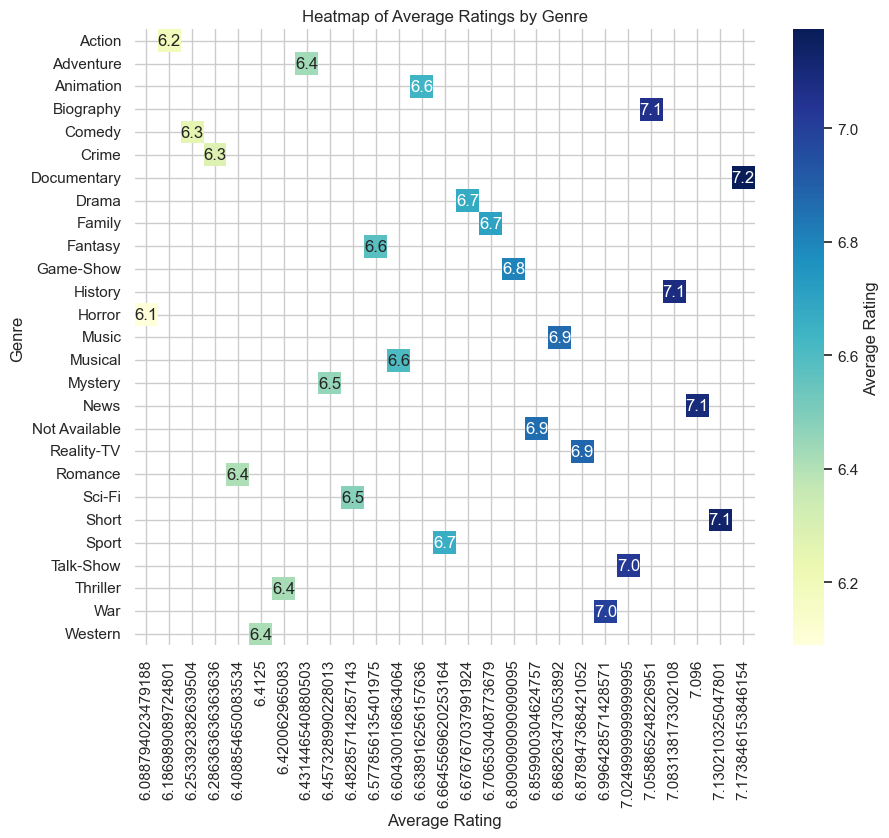

In [115]:
# Create a DataFrame for the heatmap
heatmap_data = genre_rating_correlation.reset_index()
heatmap_data.columns = ['Genre', 'Average Rating']

# Reshape the data for the heatmap (optional, if you want to display it in a grid format)
heatmap_pivot = heatmap_data.pivot("Genre", "Average Rating", "Average Rating")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Rating'})
plt.title('Heatmap of Average Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

## Key Insights on Average Genre Ratings

1. **High Ratings for Informative Content**: Documentary (7.17), Short (7.13), and News (7.10) genres consistently lead in average ratings, reflecting a strong audience appreciation for informative and concise storytelling. This trend suggests that viewers are increasingly drawn to content that offers educational value, insights into real-world events, and thought-provoking narratives. The higher ratings indicate that such genres are not only well-received but also fulfill a significant demand for quality informational content in a diverse media landscape.<br>

2. **Mixed Reviews for Certain Genres**: Genres like War (6.99), Reality-TV (6.88), and Music (6.87) hover around the average rating mark, indicating that while they successfully attract substantial viewership, they often encounter divided opinions. This phenomenon might stem from the reliance on familiar tropes or formulaic storytelling, which can lead to viewer fatigue and diminished satisfaction. The varying execution quality within these genres may also contribute to the inconsistency in audience ratings, suggesting that content creators need to innovate to elevate the overall viewing experience.<br>

3. **Mid-to-Low Ratings for Broad Appeal Genres**: Family (6.71), Drama (6.68), and Sport (6.66) genres display mid-to-low average ratings, which is noteworthy considering their traditional appeal to a wide audience base. These lower ratings could signal a saturation of similar content in these categories, leading to unmet expectations among viewers. Additionally, as audiences become more discerning, there may be a growing demand for originality and emotional depth in storytelling to engage them effectively.<br>

4. **Need for Innovation in Animation and Fantasy**: Animation (6.64), Musical (6.60), and Fantasy (6.58) genres feature lower average ratings, indicating a potential need for creative revitalization. The lower scores may highlight challenges in meeting the evolving tastes of audiences who seek not just entertainment but also innovative storytelling and high production values. In the case of animation, this disparity could reflect a divide between family-oriented films and more adult-themed content, suggesting that creators should explore diverse narratives to cater to varying audience segments.<br>

5. **Low Ratings for Horror and Action**: Genres like Horror (6.09) and Action (6.19) rank among the lowest in terms of average ratings. This trend could be attributed to the prevalence of low-quality films that saturate these genres, leading to viewer disappointment and disengagement. Additionally, audience fatigue with clichéd storylines and predictable tropes may further diminish satisfaction. The inherently subjective nature of horror and action genres also introduces variability in viewer experiences, indicating a pressing need for fresh, innovative approaches to reinvigorate these popular genres and enhance viewer enjoyment.


# **Task 5**

## Popular Movies and Trends:
1. Identify the top 10 highest-rated movies.
2. Find the top 10 most-watched movies (by the number of ratings).
3. Explore if certain movie genres have higher average ratings.

In [118]:
# 1. The top 10 highest-rated movies.
top_10_movies = Movies_copy[['Movie Name', 'Rating(10)']].sort_values(by='Rating(10)', ascending=False).head(10)
top_10_movies.reset_index(drop=True, inplace=True)
top_10_movies

,Movie Name,Rating(10)
0,Antak,10.0
1,Ilu-Ilu,10.0
2,Ashi Fasli Nanachi Tang,10.0
3,Marasim - Beyond Borders,10.0
4,Bihari Binani,10.0
5,Harsukh,10.0
6,An Extraordinary Journey,10.0
7,The Invisible Humans,9.9
8,Maassab (The Teacher),9.9
9,The Survivor,9.9


In [119]:
# 2.The top 10 most-watched movies (by the number of votes).
top_10_most_watched = Movies_copy[['Movie Name', 'Votes']].sort_values(by='Votes', ascending=False).head(10)
top_10_most_watched.reset_index(drop=True, inplace=True)
top_10_most_watched

,Movie Name,Votes
0,Iron Man,954861
1,Indiana Jones and the Raiders of the Lost Ark,894336
2,Star Wars: Episode I - The Phantom Menace,740452
3,3 Idiots,351187
4,Zero Dark Thirty,275912
5,The Jungle Book,261319
6,Eastern Promises,230284
7,Escape Plan,229488
8,Get Smart,205758
9,A Good Day to Die Hard,199575


In Task 5 2nd analysis asked to find the top 10 most-watched movies (by the number of ratings). instead we perform The top 10 most-watched movies (by the number of votes). As in dataset there is column mentioning how many ratings a movie received by viewrs. Rating(10) columnn is present in dataset but if we take consider that column it will give same result as top 10 rated movies instead of top most watched movies. So we consider votes column will be more suitable to do analysis as we can consider more a movie watched by user it gets more votes.

In [120]:
# 3.Top 5 Movie genres having higher average ratings.
movie_genres_with_high_average_ratings=df_exploded_genre.groupby('Genre')['Rating(10)'].mean().sort_values(ascending=False)
movie_genres_with_high_average_ratings.head(5)

Genre
Documentary    7.173846
Short          7.130210
News           7.096000
History        7.083138
Biography      7.058865
Name: Rating(10), dtype: float64

# **Task 6**

## Time-Based Analysis:

1. Perform an analysis to see how ratings have changed over time (using the
timestamp).
2. Investigate if there are particular years or seasons where movies receive higher
ratings

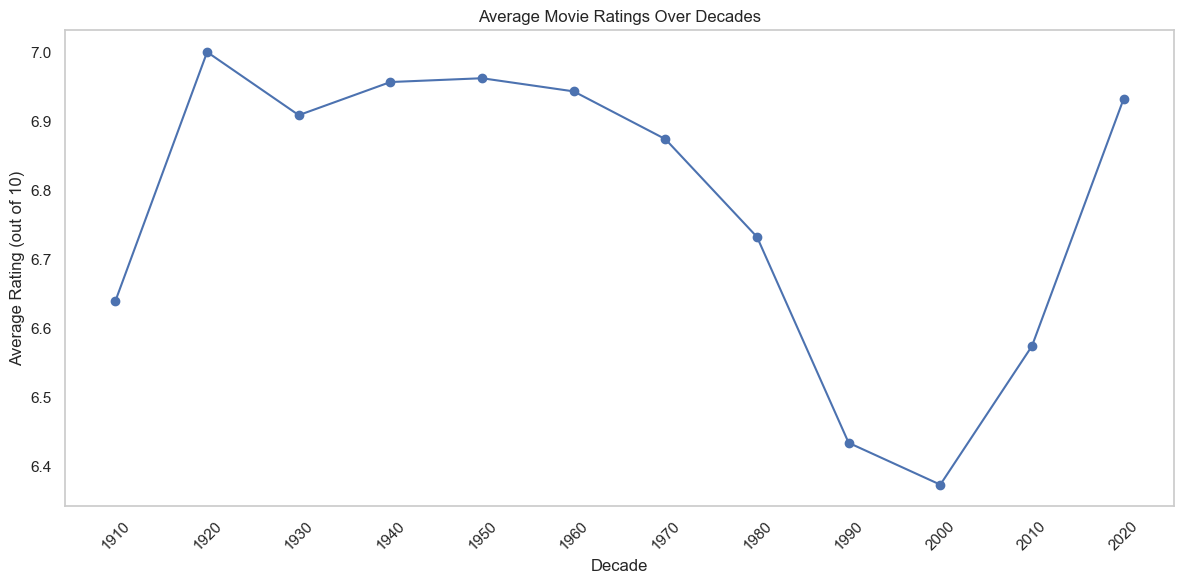

In [127]:
# 1. analysis to see how ratings have changed over time

# Convert the year into decades as there are so many unique year
Movies_copy['decade'] = (Movies_copy['Year'] // 10) * 10

# Group data by decade and calculate average ratings
average_ratings_by_decade = Movies_copy.groupby('decade')['Rating(10)'].mean().reset_index()

# Plotting the trend of average ratings over decades
plt.figure(figsize=(12, 6))
plt.plot(average_ratings_by_decade['decade'], average_ratings_by_decade['Rating(10)'], marker='o')
plt.title('Average Movie Ratings Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Rating (out of 10)')
plt.xticks(average_ratings_by_decade['decade'], rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.tight_layout()
plt.show()

## **Key Insights:**

1. Early 20th Century Peak: The graph shows that movies from the 1920s achieved the highest average ratings, around 7.0. This suggests that films from this era were particularly well-received by audiences, potentially reflecting the excitement of early filmmaking innovations like silent films and the birth of Hollywood.

2. Stable Period from 1930s to 1960s: From the 1930s to the 1960s, average ratings remained consistently high, fluctuating between 6.8 and 7.0. This stability indicates a period of cinematic growth and maturation, possibly due to the establishment of genres, classic Hollywood filmmaking techniques, and the golden age of cinema.

3. Ratings Decline in the 1970s and 2000s: Starting in the 1970s, the average ratings of movies show a clear decline, reaching their lowest point in the 2000s at around 6.4. This drop could be due to changes in the film industry, such as the rise of blockbuster movies, commercialization, or shifting audience tastes toward more diverse entertainment options.

4. Resurgence in the 2010s: There is a notable recovery in the 2010s, with ratings climbing back to around 7.0 in the 2020s. This rise might be driven by technological advancements, the growing impact of global cinema, and the increasing diversity of content that resonates with modern audiences.

5. Cyclical Trends: The ratings exhibit a cyclical pattern, with periods of peak and decline, reflecting evolving filmmaking styles, industry dynamics, and changing audience expectations over the decades.

In [129]:
# 2. years or seasons where movies receive higher ratings

ratings_over_time = Movies_copy.groupby('Year')['Rating(10)'].mean().sort_values(ascending=False).reset_index()
ratings_over_time.head(10)

,Year,Rating(10)
0,1930,7.150000
1,1948,7.023485
2,1953,7.021583
3,1950,7.019079
4,1949,7.016429
5,1955,7.009694
6,1938,7.007865
7,1947,7.006306
8,1940,7.004762
9,1913,7.000000


# **Conclusion:**

1. The analysis of movie ratings reveals a distinct pattern in audience behavior. The majority of movies are rated between 6 and 8, reflecting a general tendency for viewers to classify films as "good" or "very good." This clustering of ratings in the mid-range suggests conservative rating habits, with audiences being cautious about rating movies either too high or too low. There is also a slight positive bias, with a higher frequency of ratings leaning towards the positive side (8-10), indicating a general preference for awarding favorable ratings. Conversely, ratings below 4 are rare, possibly due to the reluctance of users to classify films as extremely poor, or a reflection of a dataset that favors more popular, well-regarded films. Exceptional ratings (above 8) are scarce, aligning with industry trends where only a few films achieve universal acclaim, underscoring the high bar set for critical success.

2. The genre distribution analysis shows that Drama dominates the dataset, with over 20,000 movies, reflecting its broad cultural appeal and emotional resonance across audiences. Action, Romance, and Comedy follow closely in popularity, highlighting their strong commercial success and widespread audience engagement. Thriller and Crime also maintain a significant presence, suggesting a high demand for suspense-driven narratives. In contrast, Animation, Sci-Fi, Sport, and War genres are much less represented, likely due to more niche production or specialized audience preferences. Additionally, genres like Talk-Show, Reality-TV, News, Game-Show, and Western are extremely rare in the dataset, reflecting their stronger association with TV programming rather than cinema.

3. The analysis of average genre ratings reveals that Documentary, Short, and News genres receive the highest ratings, indicating a strong viewer preference for informative, concise storytelling that offers educational value and real-world insights. War, Reality-TV, and Music genres perform around the average rating, reflecting mixed audience reactions, possibly due to formulaic content or execution inconsistencies. Despite their broad appeal, Family, Drama, and Sport genres show mid-to-low average ratings, which may suggest content saturation or unmet audience expectations for originality and depth. Animation, Musical, and Fantasy genres also suffer from lower ratings, indicating a need for innovation to meet evolving viewer preferences and demands for more sophisticated storytelling. Horror and Action, with the lowest average ratings, seem particularly affected by genre fatigue, clichéd tropes, and variable execution quality, highlighting the need for fresh, creative approaches to reinvigorate these popular but struggling genres.

4. The analysis of movie ratings over time reveals notable cyclical patterns. Movies from the 1920s achieved the highest average ratings, around 7.0, reflecting the audience's excitement over early filmmaking innovations and the dawn of Hollywood. From the 1930s to the 1960s, ratings remained consistently high, suggesting a period of cinematic growth during the golden age of cinema, as genres solidified and filmmaking techniques matured. However, a decline in ratings began in the 1970s and continued into the 2000s, where ratings hit a low point of 6.4. This may be attributed to industry shifts like the rise of blockbusters and commercialization. Encouragingly, there is a resurgence in the 2010s, with ratings climbing back to 7.0 in the 2020s, driven by technological advancements, global cinema's influence, and diverse content catering to modern tastes. These fluctuations highlight the cyclical nature of movie ratings, shaped by evolving industry dynamics and audience expectations.











# **Areas for Further Analysis and Recommendations for Improving User Engagement:**

## Genre-Specific Engagement Strategies: 
Further analysis can focus on understanding why certain genres, like Horror and Action, receive lower average ratings. Investigating viewer feedback, reviews, or patterns in low-rated movies could reveal insights into audience fatigue or dissatisfaction with formulaic content. Based on these findings, content creators could introduce innovative storylines or revitalized production techniques to enhance viewer engagement in these genres.

## Exploring Audience Demographics:
 Analyzing ratings based on demographic data (e.g., age, gender, region) could provide a deeper understanding of how different audience segments respond to various genres and films. This could help platforms tailor their content recommendations and marketing strategies to specific user groups, improving personalization and satisfaction.

## Impact of Technological Advancements: 
Investigating how new technologies like streaming platforms, CGI, and immersive formats (such as VR/AR) impact ratings could offer insights into what technological innovations resonate most with audiences. Encouraging interactive or enhanced viewing experiences might drive higher engagement and ratings.

## Decade-Based Trends in Movie Preferences:
 With the notable cyclical trends in ratings, further analysis could look into what specific elements of filmmaking or cultural trends contribute to the rise and fall of ratings across different decades. Recommendations based on this insight might include revisiting successful past movie elements or styles to cater to nostalgia while integrating modern sensibilities.

## Encouraging Quality over Quantity in Content: 
The steady decline in ratings from the 1970s to 2000s, followed by a resurgence, suggests that an emphasis on high-quality, diverse content is essential for sustaining audience interest. Platforms and filmmakers should focus on storytelling innovation, emotional depth, and production quality across all genres to maintain high ratings and ensure long-term engagement.

## Engaging Niche Genre Audiences:
 Certain genres, such as Documentary, Short, and News, receive consistently high ratings. Further analysis into what drives user satisfaction in these genres can offer strategies to improve engagement across other genres. Expanding content offerings in highly rated niche genres could also help diversify the platform’s audience base and provide a broader range of viewing options.

**By analyzing these areas in more detail and applying targeted engagement strategies, user satisfaction and retention could be significantly improved.**